# Kaggle 2021 Survey - Exploratory Data Analysis and Prediction based on demographics.

This data is from the kaggle.com survey data from 2021. Kaggle.com is an online plaform for learning, networking, competitions, and discussions on all things data science and machine learning. Kaggles users are a wide range of demographics from all around the world. Kaggle sends a survey to it's users yearly to get a better understanding of thier users. 

More information on the survey can be found in the attached PDF documents. 

## Questions: ##
- What is the effect of a persons demographics on the amount of time they spent on the survey?
- Gender, Location, Sex, Age, Years of Exp. Vs Time Taken
- Could a prediction be made to detrimine the time taken based on theses demographics?
- Could this be used to check the validity of a users survey? 

## EDA plan
- I would like to plot bar graphs showing the number of respondants in each group
- Plot bar graphs of the demographic vs the time taken
- Eliminate outliers
- Check siginficance

## Referenced Notebooks
**https://www.kaggle.com/kenjee/kaggle-project-from-scratch** Thanks to Ken Jee's notebook. 
**kaggle.com** Thanks to kaggle for the survey data and notebooks from their courses.

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import statistics 
import seaborn as sns
from numpy import median
from scipy.stats import norm, kurtosis, skew
from pingouin import kruskal, read_dataset
#Show more rows of the dataframe
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [3]:
def Plot_Histogram(time):
    time_data = time
    plt.hist(time_data, bins = 100)
    plt.show()
    print("The number of values: " + str(time_data.count()))
    print("Max value: " + str(time_data.max()) + ' seconds')
    print("Min value " + str(time_data.min() )+ ' seconds')

In [4]:
data = pd.read_csv('kaggle_survey_2020_responses.csv')
questions = data.iloc[0, :].T
#data.head()
data.shape

C:\Users\me_qu\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.9.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\me_qu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(20037, 355)

In [5]:
data_final = data.iloc[1:, :]
data_final.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

# Data Detour: Some people are born programmers
- Question 6 asks how many years of programming experince you have. 
- Question 1 asks your age. 
- 5 people started programming before birth or shortly after
- Compare question 6 below with Question 1

In [6]:
newdf = data.loc[(data['Q1'] == "18-21") & (data['Q6'] == "20+ years")]
newdf.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

## Now back to your regulary scheduled EDA

In [7]:
#Convert time to integer
data_final['Time from Start to Finish (seconds)']=data_final['Time from Start to Finish (seconds)'].astype(int)

<ipython-input-7-35e189194fc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['Time from Start to Finish (seconds)']=data_final['Time from Start to Finish (seconds)'].astype(int)


# I'm going to look at a histogram of the time data

- You can see that their are some major outliers, problay from people leaving their computer while taking the survey and then coming back to finish

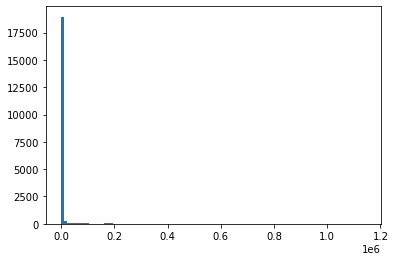

The number of values: 20036
Max value: 1144493 seconds
Min value 20 seconds


In [8]:
Plot_Histogram(data_final['Time from Start to Finish (seconds)'])

# Let's drop some outliers. 
Looks like someone left their computer on and came back to finsiih

In [9]:
data_final = data_final[data_final['Time from Start to Finish (seconds)'].between(data_final['Time from Start to Finish (seconds)'].quantile(0), data_final['Time from Start to Finish (seconds)'].quantile(0.90))]

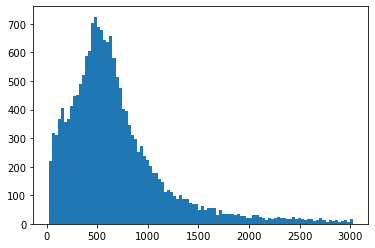

The number of values: 18032
Max value: 3027 seconds
Min value 20 seconds


In [10]:
Plot_Histogram(data_final['Time from Start to Finish (seconds)'])

In [11]:
data_final.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

In [12]:
data_final.describe()

,Time from Start to Finish (seconds)
count,18032.000000
mean,687.232697
std,497.840832
min,20.000000
25%,372.000000
50%,578.000000
75%,854.000000
max,3027.000000


# Plot time taken per group 

Text(0.5, 1.0, 'Salary - Question 24')

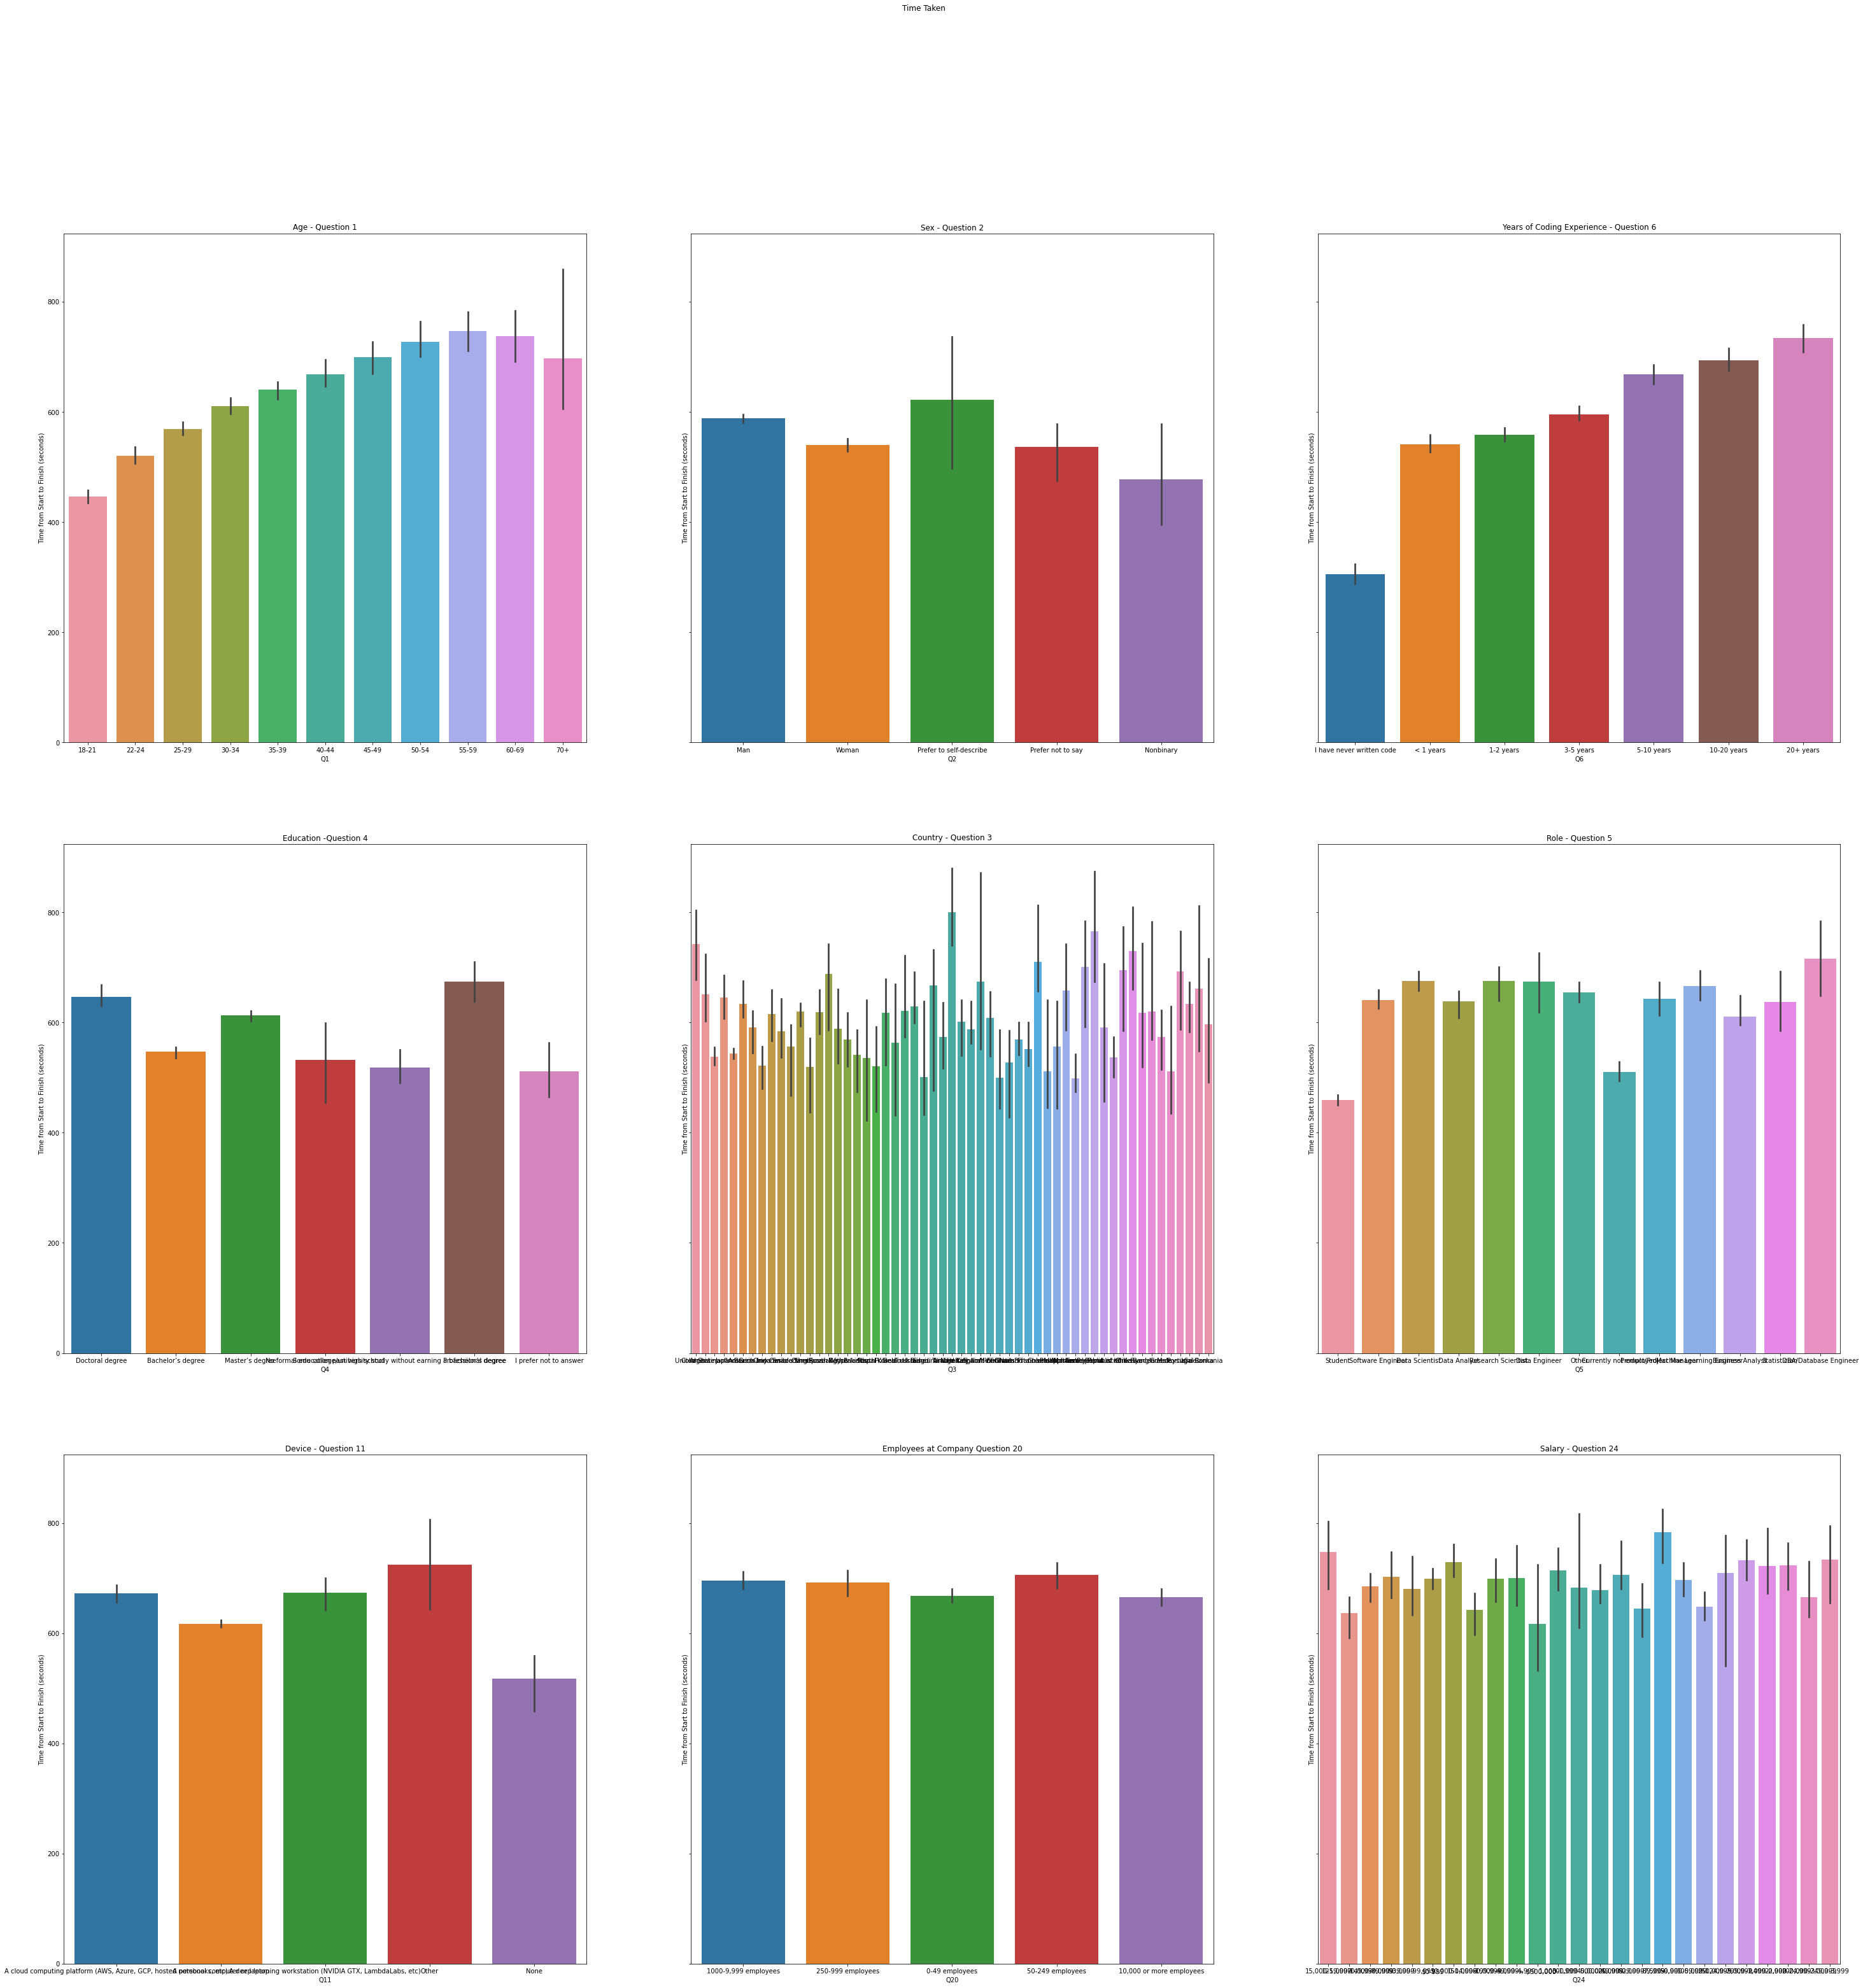

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(50, 50), sharey=True)
fig.suptitle('Time Taken')

sns.barplot(ax = axes[0][0],x=data_final['Q1'], y=data_final['Time from Start to Finish (seconds)'],order=['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49','50-54','55-59','60-69','70+'],estimator = median)
axes[0][0].set_title("Age - Question 1")

sns.barplot(ax= axes[0,1],x=data_final['Q2'], y=data_final['Time from Start to Finish (seconds)'],estimator = median)
axes[0][1].set_title("Sex - Question 2")

sns.barplot(ax = axes[0,2], x=data_final['Q6'], y=data_final['Time from Start to Finish (seconds)'],order=['I have never written code','< 1 years','1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years'],estimator = median) #PUT THIS IN ORDER LIKE THE AGE!!
axes[0][2].set_title("Years of Coding Experience - Question 6")
# I already see a bias in the years of experince data. The question is misleading. 

sns.barplot(ax= axes[1,0],x=data_final['Q4'], y=data_final['Time from Start to Finish (seconds)'],estimator = median)
axes[1][0].set_title("Education -Question 4")

sns.barplot(ax= axes[1,1],x=data_final['Q3'], y=data_final['Time from Start to Finish (seconds)'],estimator = median)
axes[1][1].set_title("Country - Question 3")

sns.barplot(ax= axes[1,2],x=data_final['Q5'], y=data_final['Time from Start to Finish (seconds)'],estimator = median)
axes[1][2].set_title("Role - Question 5")

sns.barplot(ax= axes[2,0],x=data_final['Q11'], y=data_final['Time from Start to Finish (seconds)'],estimator = median)
axes[2][0].set_title("Device - Question 11")

sns.barplot(ax= axes[2,1],x=data_final['Q20'], y=data_final['Time from Start to Finish (seconds)'],estimator = median)
axes[2][1].set_title("Employees at Company Question 20")

sns.barplot(ax= axes[2,2],x=data_final['Q24'], y=data_final['Time from Start to Finish (seconds)'],estimator = median)
axes[2][2].set_title("Salary - Question 24")



# Looking at the graphs above.
- It's intresting how much difference their is in the countries. 
- When you look at age and years expereince, their seems to be a pattern. I think this makes sense, because the older someone is, the more expereince they have, and the more answers they have to put into the survey

In [16]:
# I wanted to be able to see country better, You can double click on graph to see it bigger. 
#from numpy import median
#fig1, axes = plt.subplots(1, 1, figsize=(50, 50), sharey=True)
#sns.barplot()
#sns.barplot(x=data_final['Q3'], y=data_final['Time from Start to Finish (seconds)'],estimator = median)

In [17]:
#Sort the countries by median and get a better look. 

time_country = pd.DataFrame({})
time_country

time_country = pd.DataFrame({'Time': data_final['Time from Start to Finish (seconds)'], 'Country': data_final['Q3']})
#timewithage
time_country_median =  time_country.groupby('Country').median()

time_country_median =time_country_median.sort_values(by = ['Time'])

time_country_median

,Time
Country,
Turkey,498.5
Viet Nam,500.0
Belgium,500.5
Malaysia,511.0
Ireland,511.0
Singapore,520.0
South Korea,521.0
China,522.0
Thailand,528.0


In [18]:
median_time_taken_all=statistics.median(data_final['Time from Start to Finish (seconds)'])
print("Median Time Taken: "+str(median_time_taken_all))
print("Max Time Taken: "+str(max(data_final['Time from Start to Finish (seconds)'])))
print("Min Time Taken: "+str(min(data_final['Time from Start to Finish (seconds)'])))

Median Time Taken: 578.0
Max Time Taken: 3027
Min Time Taken: 20


In [19]:
data_final.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

In [20]:
data_final['Time from Start to Finish (seconds)'].value_counts(bins=800)

(493.602, 497.361]              114
(508.638, 512.396]              108
(557.501, 561.26]               107
(613.882, 617.641]              107
(606.365, 610.124]              105
(561.26, 565.019]               105
(463.532, 467.291]              103
(489.844, 493.602]              103
(440.98, 444.739]               102
(527.431, 531.19]               101
(478.568, 482.326]              100
(534.949, 538.708]               99
(497.361, 501.12]                97
(523.672, 527.431]               94
(568.778, 572.536]               93
(467.291, 471.05]                93
(647.711, 651.47]                92
(474.809, 478.568]               91
(444.739, 448.498]               91
(628.918, 632.676]               91
(636.435, 640.194]               91
(433.462, 437.221]               90
(553.742, 557.501]               89
(576.295, 580.054]               88
(399.634, 403.392]               87
(429.704, 433.462]               87
(519.914, 523.672]               86
(670.264, 674.022]          

In [21]:
time_country = pd.DataFrame({'Time': data_final['Time from Start to Finish (seconds)'], 'Country': data_final['Q3']})
time_age = pd.DataFrame({'Time': data_final['Time from Start to Finish (seconds)'], 'Age': data_final['Q1']})
time_codeyear = pd.DataFrame({'Time': data_final['Time from Start to Finish (seconds)'], 'YearsExp': data_final['Q6']})
time_sex = pd.DataFrame({'Time': data_final['Time from Start to Finish (seconds)'], 'Sex': data_final['Q2']})
time_compsize = pd.DataFrame({'Time': data_final['Time from Start to Finish (seconds)'], 'CompanySize': data_final['Q20']})

In [22]:
time_country                                     

,Time,Country
1,1838,Colombia
3,860,Argentina
4,507,United States of America
5,78,Japan
6,401,India
...,...,...
20032,126,Turkey
20033,566,United Kingdom of Great Britain and Northern I...
20034,238,Brazil
20035,625,India


# Checking stastical significance between groups
So I have actually never heard of the kruskal-Wallis H-test for independent samples, but this supposably is the way you handle data that is not normal. Here the p value is your significance level, and if this value is less than 0.05, then their are signficant differences between groups. 

### https://pingouin-stats.org/generated/pingouin.kruskal.html

In [23]:

df = time_country
print(kruskal(data=df, dv='Time', between='Country',))


df = time_age
print(kruskal(data=df, dv='Time', between='Age',))


df = time_codeyear
print(kruskal(data=df, dv='Time', between='YearsExp',))


df = time_sex
print(kruskal(data=df, dv='Time', between='Sex',))


df = time_compsize
print(kruskal(data=df, dv='Time', between='CompanySize',))

          Source  ddof1           H         p-unc
Kruskal  Country     54  406.335351  1.671536e-55
        Source  ddof1            H          p-unc
Kruskal    Age     10  1028.531782  1.333784e-214
           Source  ddof1            H          p-unc
Kruskal  YearsExp      6  1203.862344  6.984258e-257
        Source  ddof1         H         p-unc
Kruskal    Sex      4  65.00448  2.567618e-13
              Source  ddof1          H     p-unc
Kruskal  CompanySize      4  29.807611  0.000005


# Model Building
I heavly used the kaggle classes to one-hot-encode and model the data. 
I wanted to replot the histogram, because I wanted to ponly look at people that answered every question that I was looking at. This shrinked the data set. 

https://machinelearningmastery.com/robust-regression-for-machine-learning-in-python/

https://www.kaggle.com/adam62810/exercise-categorical-variables/edit

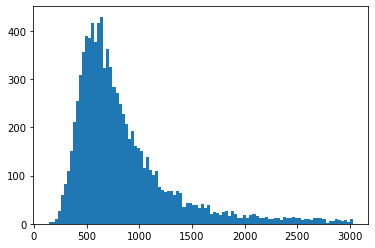

The number of values: 9137
Max value: 3027 seconds
Min value 138 seconds


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Set X to the data
X = data_final
# Use only the questions listed to create my data frame
X = pd.DataFrame({'Time': data_final['Time from Start to Finish (seconds)'],'Q1': X['Q1'], 'Q2': data_final['Q2'], 'Q3': data_final['Q3'], 'Q4': data_final['Q4'], 'Q5': data_final['Q5'], 'Q6': data_final['Q6'],'Q11': data_final['Q11'],'Q20': data_final['Q20'],'Q24': data_final['Q24']})
#Drop rows where the data has been N/A
X = X.dropna(axis = 0)

#Set y to the time
y = X['Time']
Plot_Histogram(y)


A few rows got dropped due to missing values

In [25]:
X


,Time,Q1,Q2,Q3,Q4,Q5,Q6,Q11,Q20,Q24
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,A personal computer or laptop,"1000-9,999 employees","15,000-19,999"
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,"A cloud computing platform (AWS, Azure, GCP, h...",250-999 employees,"125,000-149,999"
9,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,"A cloud computing platform (AWS, Azure, GCP, h...","1000-9,999 employees","70,000-79,999"
12,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,A personal computer or laptop,0-49 employees,"30,000-39,999"
14,378,30-34,Man,Canada,Bachelor’s degree,Data Engineer,< 1 years,A personal computer or laptop,0-49 employees,"90,000-99,999"
...,...,...,...,...,...,...,...,...,...,...
20023,864,25-29,Man,Brazil,Master’s degree,Research Scientist,5-10 years,A personal computer or laptop,"10,000 or more employees","7,500-9,999"
20025,2104,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,A personal computer or laptop,0-49 employees,"2,000-2,999"
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,A personal computer or laptop,0-49 employees,$0-999
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,"A cloud computing platform (AWS, Azure, GCP, h...","10,000 or more employees",$0-999


In [26]:
time_country = pd.DataFrame({'Time': X['Time'], 'Country': X['Q3']})
time_age = pd.DataFrame({'Time': X['Time'], 'Age': X['Q1']})
time_codeyear = pd.DataFrame({'Time': X['Time'], 'YearsExp': X['Q6']})
time_sex = pd.DataFrame({'Time': X['Time'], 'Sex': X['Q2']})
time_compsize = pd.DataFrame({'Time': X['Time'], 'CompanySize': X['Q20']})

In [27]:

df = time_country
print(kruskal(data=df, dv='Time', between='Country',))


df = time_age
print(kruskal(data=df, dv='Time', between='Age',))


df = time_codeyear
print(kruskal(data=df, dv='Time', between='YearsExp',))


df = time_sex
print(kruskal(data=df, dv='Time', between='Sex',))


df = time_compsize
print(kruskal(data=df, dv='Time', between='CompanySize',))

          Source  ddof1           H         p-unc
Kruskal  Country     54  424.434301  6.058639e-59
        Source  ddof1           H         p-unc
Kruskal    Age     10  192.149689  6.977841e-36
           Source  ddof1         H         p-unc
Kruskal  YearsExp      5  64.09591  1.725752e-12
        Source  ddof1         H  p-unc
Kruskal    Sex      4  5.235247  0.264
              Source  ddof1         H     p-unc
Kruskal  CompanySize      4  16.57959  0.002332


In [28]:
from scipy import stats
p = stats.normaltest(y)
print(p)
print(kurtosis(y))
print(skew(y))

NormaltestResult(statistic=3398.6844127076724, pvalue=0.0)
4.115829119055325
1.8954526228838389


In [29]:
#Drop the time column from the X data frame
X =X.drop(columns=['Time'])

In [30]:
X.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q11,Q20,Q24
3,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,A personal computer or laptop,"1000-9,999 employees","15,000-19,999"
4,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,"A cloud computing platform (AWS, Azure, GCP, h...",250-999 employees,"125,000-149,999"
9,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,"A cloud computing platform (AWS, Azure, GCP, h...","1000-9,999 employees","70,000-79,999"
12,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,A personal computer or laptop,0-49 employees,"30,000-39,999"
14,30-34,Man,Canada,Bachelor’s degree,Data Engineer,< 1 years,A personal computer or laptop,0-49 employees,"90,000-99,999"


In [31]:
y.head()

3     860
4     507
9     762
12    742
14    378
Name: Time, dtype: int32

In [32]:
#Split the data set into training and test
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)



In [33]:
X_train.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q11,Q20,Q24
3245,40-44,Woman,Canada,Master’s degree,Software Engineer,20+ years,"A cloud computing platform (AWS, Azure, GCP, h...","10,000 or more employees",$0-999
16377,25-29,Man,Brazil,Bachelor’s degree,Product/Project Manager,3-5 years,A personal computer or laptop,"1000-9,999 employees","20,000-24,999"
16966,40-44,Man,Other,Bachelor’s degree,Software Engineer,10-20 years,A personal computer or laptop,0-49 employees,"80,000-89,999"
15769,25-29,Man,Kenya,Bachelor’s degree,Data Analyst,< 1 years,A personal computer or laptop,0-49 employees,$0-999
16285,25-29,Man,United States of America,Bachelor’s degree,Machine Learning Engineer,1-2 years,A personal computer or laptop,250-999 employees,"150,000-199,999"


In [34]:
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

In [35]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Q2', 5),
 ('Q11', 5),
 ('Q20', 5),
 ('Q6', 6),
 ('Q4', 7),
 ('Q1', 11),
 ('Q5', 11),
 ('Q24', 25),
 ('Q3', 55)]

In [36]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [37]:
OH_X_valid

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129
14928,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8872,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14686,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import tree
import sys
#TRAIN THE MODEL
model = RandomForestRegressor(n_estimators=20, random_state=0)
model.fit(OH_X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [39]:
# MAKE PREDICTIONS AND GET ERROR
preds = model.predict(OH_X_valid)
np.set_printoptions(threshold=sys.maxsize)
MAE = mean_absolute_error(y_valid,preds)

In [40]:
print("Mean absolute error is: " +str(MAE/60) + ' Minutes')

Mean absolute error is: 5.887195550738972 Minutes


# Predictions

In [48]:
import random
test_person = random.randrange(len(preds))
print("Person: " + str(test_person))

Person: 1673


In [49]:
display(X_valid.iloc[[test_person]])
print("This person took : " + str(y_valid.iloc[test_person]/60) + " Minutes, and our model guessed: " + str(preds[test_person]/60) + "Minutes")

print("That is a difference of: " + str(y_valid.iloc[test_person]/60-preds[test_person]/60) + " Minutes")

,Q1,Q2,Q3,Q4,Q5,Q6,Q11,Q20,Q24
831,30-34,Man,India,Bachelor’s degree,Machine Learning Engineer,5-10 years,"A cloud computing platform (AWS, Azure, GCP, h...","1000-9,999 employees","2,000-2,999"


This person took : 10.933333333333334 Minutes, and our model guessed: 12.555833333333334Minutes
That is a difference of: -1.6225000000000005 Minutes


# Conclusions
- Some major imporvements could be made here, by loooking at other questions, if you were given the optoinal questions, it would have taken longer, but I think this might also be captured with your years of experence, etc. 

- It's possible that you could use time taken data over the years to check the validity of a respondants data. Based on the demograhics they have chosen, did they legitmaly fill out the survey or did they just click through random answers. 

- Need to crossvalidate data